In [1]:
import src.features as lf
import src.models as lm

import tensorflow as tf

#### Directories
lm.models.RECORD_DIR='../models/records'
lm.models.FIGURE_DIR='../reports/figures'

data = lf.data_builder.create_dataset_from_directory('../data/v2-plant-seedlings-dataset/')



/Users/olivier/pythonEnvs/tf2/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Chargement du meilleur modèle et évaluation sur le jeu de test

In [11]:
best_model = lm.final_test.stage4.MobileNetv3(data,'final-test2')
best_model.fit_or_load(training=False)
best_model.evaluate()

Found 4382 validated image filenames belonging to 12 classes.
Found 597 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> 4-dense-Mob –– Loading
++++++model++++++history1+++
>>> 4-dense-Mob –– Evaluation
18/18 [==============================] - 10s 521ms/step


,filename,actual,predicted,Same
0,../data/v2-plant-seedlings-dataset/Small-flowe...,Small-flowered Cranesbill,Small-flowered Cranesbill,True
1,../data/v2-plant-seedlings-dataset/Scentless M...,Scentless Mayweed,Scentless Mayweed,True
2,../data/v2-plant-seedlings-dataset/Cleavers/30...,Cleavers,Cleavers,True
3,../data/v2-plant-seedlings-dataset/Sugar beet/...,Sugar beet,Sugar beet,True
4,../data/v2-plant-seedlings-dataset/Common Chic...,Common Chickweed,Common Chickweed,True
...,...,...,...,...
549,../data/v2-plant-seedlings-dataset/Fat Hen/539...,Fat Hen,Fat Hen,True
550,../data/v2-plant-seedlings-dataset/Small-flowe...,Small-flowered Cranesbill,Small-flowered Cranesbill,True
551,../data/v2-plant-seedlings-dataset/Loose Silky...,Loose Silky-bent,Loose Silky-bent,True
552,../data/v2-plant-seedlings-dataset/Common Chic...,Common Chickweed,Common Chickweed,True


# Résultats sur le jeu de test

In [12]:
best_model.print_classification_report()

>>> 4-dense-Mob –– Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.72      0.79      0.75        29
                 Charlock       1.00      0.97      0.99        35
                 Cleavers       0.97      1.00      0.99        38
         Common Chickweed       1.00      0.99      0.99        80
             Common wheat       0.91      1.00      0.95        21
                  Fat Hen       1.00      1.00      1.00        54
         Loose Silky-bent       0.93      0.87      0.90        77
                    Maize       1.00      1.00      1.00        20
        Scentless Mayweed       0.98      1.00      0.99        52
         Shepherd’s Purse       1.00      1.00      1.00        22
Small-flowered Cranesbill       1.00      1.00      1.00        70
               Sugar beet       1.00      1.00      1.00        56

                 accuracy                           0.97       554
                mac

'                           precision    recall  f1-score   support\n\n              Black-grass       0.72      0.79      0.75        29\n                 Charlock       1.00      0.97      0.99        35\n                 Cleavers       0.97      1.00      0.99        38\n         Common Chickweed       1.00      0.99      0.99        80\n             Common wheat       0.91      1.00      0.95        21\n                  Fat Hen       1.00      1.00      1.00        54\n         Loose Silky-bent       0.93      0.87      0.90        77\n                    Maize       1.00      1.00      1.00        20\n        Scentless Mayweed       0.98      1.00      0.99        52\n         Shepherd’s Purse       1.00      1.00      1.00        22\nSmall-flowered Cranesbill       1.00      1.00      1.00        70\n               Sugar beet       1.00      1.00      1.00        56\n\n                 accuracy                           0.97       554\n                macro avg       0.96      0

# Association des types SilkyBent et Black Grass

In [15]:
result_df = best_model.results
result_df.loc[result_df['actual']=='Loose Silky-bent','actual'] = 'Silky-Bent - Black Grass'
result_df.loc[result_df['actual']=='Black-grass','actual'] = 'Silky-Bent - Black Grass'
result_df.loc[result_df['predicted']=='Loose Silky-bent','predicted'] = 'Silky-Bent - Black Grass'
result_df.loc[result_df['predicted']=='Black-grass','predicted'] = 'Silky-Bent - Black Grass'
result_df.Same= (result_df.predicted == result_df.actual)
result_df

,filename,actual,predicted,Same
0,../data/v2-plant-seedlings-dataset/Small-flowe...,Small-flowered Cranesbill,Small-flowered Cranesbill,True
1,../data/v2-plant-seedlings-dataset/Scentless M...,Scentless Mayweed,Scentless Mayweed,True
2,../data/v2-plant-seedlings-dataset/Cleavers/30...,Cleavers,Cleavers,True
3,../data/v2-plant-seedlings-dataset/Sugar beet/...,Sugar beet,Sugar beet,True
4,../data/v2-plant-seedlings-dataset/Common Chic...,Common Chickweed,Common Chickweed,True
...,...,...,...,...
549,../data/v2-plant-seedlings-dataset/Fat Hen/539...,Fat Hen,Fat Hen,True
550,../data/v2-plant-seedlings-dataset/Small-flowe...,Small-flowered Cranesbill,Small-flowered Cranesbill,True
551,../data/v2-plant-seedlings-dataset/Loose Silky...,Silky-Bent - Black Grass,Silky-Bent - Black Grass,True
552,../data/v2-plant-seedlings-dataset/Common Chic...,Common Chickweed,Common Chickweed,True


In [16]:
best_model.print_classification_report()

>>> 4-dense-Mob –– Classification Report
                           precision    recall  f1-score   support

                 Charlock       1.00      0.97      0.99        35
                 Cleavers       0.97      1.00      0.99        38
         Common Chickweed       1.00      0.99      0.99        80
             Common wheat       0.91      1.00      0.95        21
                  Fat Hen       1.00      1.00      1.00        54
                    Maize       1.00      1.00      1.00        20
        Scentless Mayweed       0.98      1.00      0.99        52
         Shepherd’s Purse       1.00      1.00      1.00        22
 Silky-Bent - Black Grass       1.00      0.98      0.99       106
Small-flowered Cranesbill       1.00      1.00      1.00        70
               Sugar beet       1.00      1.00      1.00        56

                 accuracy                           0.99       554
                macro avg       0.99      0.99      0.99       554
             weight

'                           precision    recall  f1-score   support\n\n                 Charlock       1.00      0.97      0.99        35\n                 Cleavers       0.97      1.00      0.99        38\n         Common Chickweed       1.00      0.99      0.99        80\n             Common wheat       0.91      1.00      0.95        21\n                  Fat Hen       1.00      1.00      1.00        54\n                    Maize       1.00      1.00      1.00        20\n        Scentless Mayweed       0.98      1.00      0.99        52\n         Shepherd’s Purse       1.00      1.00      1.00        22\n Silky-Bent - Black Grass       1.00      0.98      0.99       106\nSmall-flowered Cranesbill       1.00      1.00      1.00        70\n               Sugar beet       1.00      1.00      1.00        56\n\n                 accuracy                           0.99       554\n                macro avg       0.99      0.99      0.99       554\n             weighted avg       0.99      0

>>> 4-dense-Mob –– Display confusion matrix


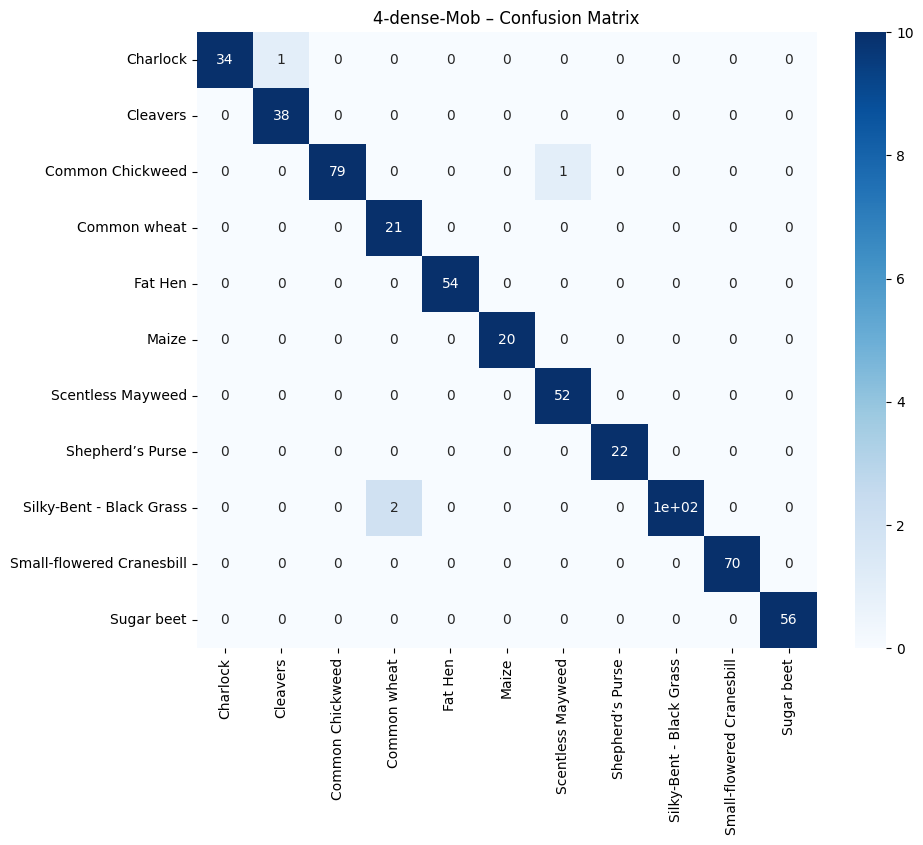

In [18]:
best_model.display_confusion_matrix()

# Affichage des mauvais résultats

>>> 4-dense-Mob –– Display training data samples


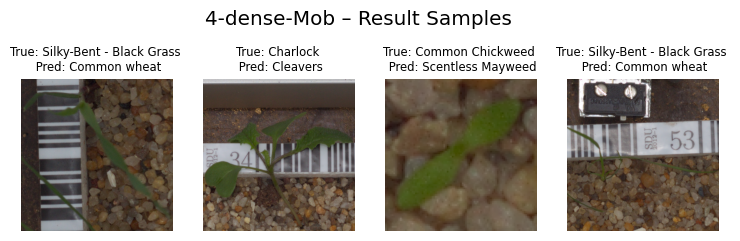

In [19]:
best_model.display_samples(nb=4, include_false_pred=True, include_true_pred=False)

>>> 4-dense-Mob –– Display training data samples


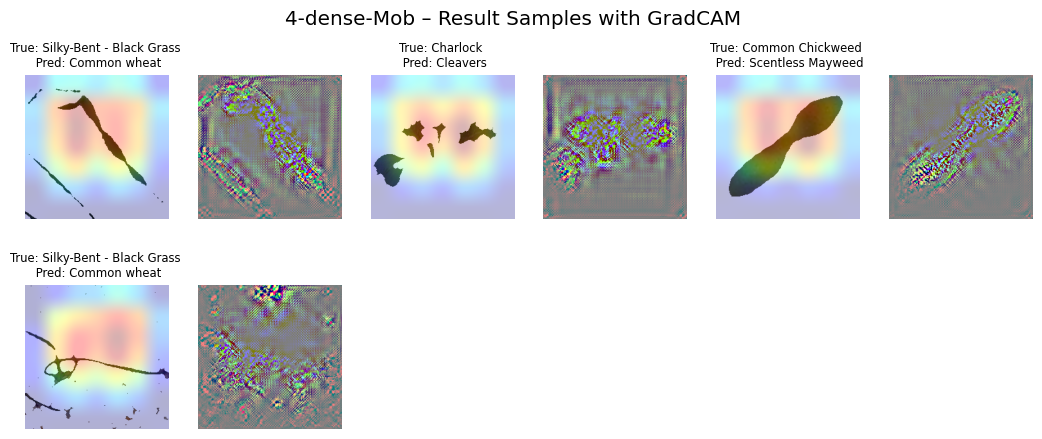

In [21]:
best_model.display_samples(nb=4, include_false_pred=True, include_true_pred=False, segmented=True, gradcam=True,guidedGrad_cam=True)